# 1. Import Libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_csv_path = r'..\data\train_test_csv\train_data.csv'
test_csv_path = r'..\data\train_test_csv\test_data.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Display the number of imported images
print(f"Number of training images: {len(train_df)}")
print(f"Number of test images: {len(test_df)}")

Number of training images: 2641
Number of test images: 294


In [3]:
train_df.Label.value_counts()

Label
airplanes            720
Motorbikes           718
BACKGROUND_Google    420
Faces_easy           392
Faces                391
Name: count, dtype: int64

In [4]:
test_df.Label.value_counts()

Label
Motorbikes           80
airplanes            80
BACKGROUND_Google    47
Faces                44
Faces_easy           43
Name: count, dtype: int64

In [5]:
train_df.head()

,HOG_0,HOG_1,HOG_2,HOG_3,HOG_4,HOG_5,HOG_6,HOG_7,HOG_8,HOG_9,...,HOG_8091,HOG_8092,HOG_8093,HOG_8094,HOG_8095,HOG_8096,HOG_8097,HOG_8098,HOG_8099,Label
0,0.027177,0.025653,0.037031,0.089839,0.168321,0.174550,0.248641,0.248641,0.171540,0.015715,...,0.030575,0.015245,0.034649,0.141972,0.307208,0.307208,0.157726,0.040761,0.040718,BACKGROUND_Google
1,0.235837,0.038368,0.031238,0.026915,0.073421,0.011923,0.004732,0.000100,0.184045,0.337206,...,0.117988,0.004348,0.007640,0.002928,0.005445,0.002255,0.010032,0.004228,0.122178,Motorbikes
2,0.140965,0.000000,0.000000,0.000000,0.001747,0.000000,0.000000,0.000000,0.141014,0.159202,...,0.364948,0.178828,0.092794,0.067782,0.066389,0.040597,0.156272,0.189141,0.364948,airplanes
3,0.382552,0.016438,0.007117,0.002574,0.015769,0.002730,0.017733,0.050059,0.382552,0.382552,...,0.349882,0.008987,0.003086,0.000883,0.029269,0.000000,0.008355,0.011984,0.349882,Motorbikes
4,0.305484,0.080676,0.015355,0.063711,0.072808,0.034462,0.012741,0.043839,0.305484,0.305484,...,0.266868,0.034736,0.031162,0.232690,0.239519,0.225903,0.266868,0.225866,0.266868,airplanes


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Label'] = label_encoder.fit_transform(train_df['Label'])
test_df['Label'] = label_encoder.transform(test_df['Label'])

# Creating Unlabelled Dataset 

In [7]:
from sklearn.model_selection import train_test_split

def partition_and_make_unlabeled(df, test_size=0.5, random_state=None):
    labeled_df1, labeled_df2 = train_test_split(df, test_size=test_size, stratify=df['Label'], random_state=random_state)
    unlabeled_df = labeled_df2.drop('Label', axis=1)
    
    return labeled_df1, labeled_df2, unlabeled_df

In [8]:
labeled_df1, labeled_df2, unlabeled_df = partition_and_make_unlabeled(train_df, test_size=0.5, random_state=42)

In [9]:
unlabeled_df.head()

,HOG_0,HOG_1,HOG_2,HOG_3,HOG_4,HOG_5,HOG_6,HOG_7,HOG_8,HOG_9,...,HOG_8090,HOG_8091,HOG_8092,HOG_8093,HOG_8094,HOG_8095,HOG_8096,HOG_8097,HOG_8098,HOG_8099
555,0.208814,0.162883,0.069686,0.120214,0.229434,0.229434,0.215048,0.093237,0.167636,0.229434,...,0.244762,0.244762,0.043267,0.095832,0.182237,0.244762,0.175809,0.223660,0.114378,0.244762
690,0.221675,0.221675,0.086677,0.170533,0.193065,0.066729,0.107892,0.098847,0.221675,0.182388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.157820,0.052291,0.007950,0.023789,0.000000,0.109076,0.000000,0.000000,0.000000,0.052291
391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143311,0.045545,0.034216,0.004756,0.009238,0.086974,0.000000,0.000000,0.000000,0.038471
1655,0.280909,0.093813,0.038950,0.013243,0.016133,0.044991,0.058486,0.073621,0.280909,0.259045,...,0.111715,0.167347,0.114433,0.131601,0.172709,0.190245,0.227673,0.190062,0.195036,0.210743


In [10]:
print(f"Size of labelled df: {len(labeled_df1)}")
print(f"Size of unlabelled df: {len(unlabeled_df)}")

Size of labelled df: 1320
Size of unlabelled df: 1321


# Model Builiding

### Getting Labels 

In [11]:
def compute_p_star(num_classes):
    return np.ones(num_classes) / num_classes

def draw_random_label(p_star):
    num_samples = len(Xu)
    labels = np.random.choice(len(p_star), size=num_samples, p=p_star)
    return labels

### function for training 

In [12]:
def train_rf(X, n_estimators=100):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth = 5)
        rf.fit(X[:,:-1], X[:,-1])
        return rf

def train_tree(X):
    dt = DecisionTreeClassifier(max_depth = 5)
    dt.fit(X[:,:-1], X[:,-1])
    return dt

### Oob error

In [13]:
def oobe(F, X, m):
    # oobe = 1 - np.mean(F.predict(X[:, :-1]) == X[:, -1])
    oobe = 1-F.oob_score
    #print(f"i: {m} oobe: {oobe}")
    return oobe

### Stopping Criteria

In [14]:
def stopping_condition(emF, e0F, m, max_epochs):
    if emF > e0F:
        return True
    if m >= max_epochs:
        return True
    return False

### Forest Enhancement

In [15]:
def semi_supervised_random_forests(Xl, Xu, num_trees, max_epochs):
    F = train_rf(Xl, num_trees)
    e0F = oobe(F, Xl, 0)
    emF = 0
    m = 0

    while True:
        m += 1
        K = len(np.unique(Xl[:,-1]))
        p_star = compute_p_star(K)
        for i in range(num_trees):
            y_hat_u = draw_random_label(p_star)
            Xn = np.vstack((Xl, np.column_stack((Xu, y_hat_u))))
            F.estimators_[i] = train_tree(Xn)
        emF = oobe(F, Xl, m)
        if stopping_condition(emF, e0F, m, max_epochs): 
            break
        e0F = emF
    return F

# Model Training

In [16]:
Xl = labeled_df1.values
Xu = unlabeled_df.values

num_trees = 50
max_epochs = 2

# Call the semi_supervised_random_forests function
forest = semi_supervised_random_forests(Xl, Xu, num_trees, max_epochs)

# Model Evaluation 

In [17]:
y_pred = forest.predict(test_df.values[:,:-1])
y_true = test_df.values[:,-1]
y_true = y_true.astype(int)
y_pred = y_pred.astype(int)

In [18]:
labels_num = label_encoder.inverse_transform(test_df['Label'])
labels = np.unique(labels_num)
labels = list(labels)

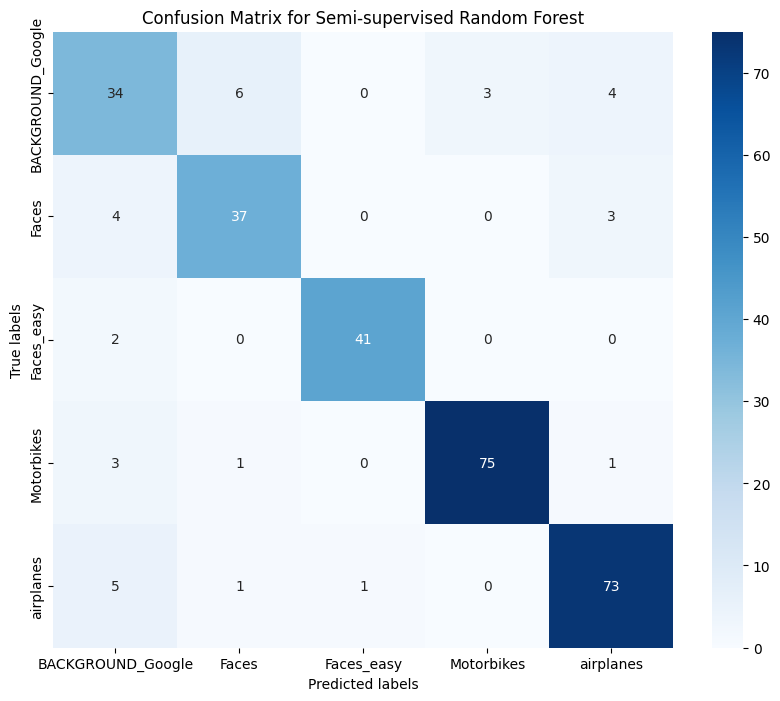

In [19]:
def plot_confusion_matrix(y_true, y_pred, label_text, label_num):
    cm = confusion_matrix(y_true, y_pred, labels=label_num)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_text, yticklabels=label_text)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for Semi-supervised Random Forest')
    plt.show()

plot_confusion_matrix(y_true, y_pred, labels, np.unique(train_df.values[:,-1]))

In [20]:
def precision_recall(y_true, y_pred):

    confusion_matrix = np.zeros((y_true.max() + 1, y_true.max() + 1))
    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1

    # precision and recall
    precision = []
    recall = []
    for i in range(y_true.max() + 1):
        tp = confusion_matrix[i, i]
        fp = np.sum(confusion_matrix[:, i]) - tp
        fn = np.sum(confusion_matrix[i, :]) - tp
        precision.append(tp / (tp + fp))
        recall.append(tp / (tp + fn))
    precisions = np.mean(precision)
    recalls = np.mean(recall)

    # Calculating accuracy
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

    # Calculating F1 score
    f1_score = 2 * (precisions * recalls) / (precisions + recalls) if (precisions + recalls) != 0 else 0

    return precisions, recalls, precision, recall, accuracy, f1_score

precision , recall, precision_list, recall_list, accuracy, f1_score = precision_recall(y_true, y_pred)

In [21]:
test_size = len(test_df)
data = {
    'Dataset': ['Caltech-101'],
    'Test Size': [test_size]
}

df = pd.DataFrame(data)

In [22]:
df['Precision'] = precision
df['Recall'] = recall
df['Accuracy'] = accuracy
df['F1 Score'] = f1_score
df

,Dataset,Test Size,Precision,Recall,Accuracy,F1 Score
0,Caltech-101,294,0.873904,0.87356,0.884354,0.873732


In [23]:
df2 = pd.DataFrame()
df2["Category"] = labels
df2["Precision"] = precision_list
df2["Recall"] = recall_list
df2

,Category,Precision,Recall
0,BACKGROUND_Google,0.708333,0.723404
1,Faces,0.822222,0.840909
2,Faces_easy,0.976190,0.953488
3,Motorbikes,0.961538,0.937500
4,airplanes,0.901235,0.912500
